## Urban Sound Classification

In [238]:
# !pip install librosa

#### Import Libraries

In [239]:
import librosa
import librosa.display as display
import pandas as pd
import numpy as np
import time 
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.offline as pyoff
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, plot, iplot

#### Definining some useful functions

In [240]:
def saveModel(model_obj,model_file_name, weights_file_name = None):
    """Save keras model to disk."""
    if weights_file_name is None:
        weights_file_name = model_file_name
    model_json = model_obj.to_json()
    with open("{}.json".format(model_file_name), "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("{}.h5".format(weights_file_name))
    print("Saved model {} to disk".format(model_file_name))

In [242]:
from keras.models import model_from_json
def loadModel(model_file_name, weights_file_name = None):
    """Load keras model from disk."""
    if weights_file_name is None:
        weights_file_name = model_file_name
    # load json and create model
    json_file = open('{}.json'.format(model_file_name), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("{}.h5".format(weights_file_name))
    print("Loaded model {} from disk".format(model_file_name))
    return loaded_model

In [244]:
# def generate_layout_bar(col_name):
#     layout_bar = go.Layout(
#         autosize=False, # auto size the graph? use False if you are specifying the height and width
#         width=800, # height of the figure in pixels
#         height=600, # height of the figure in pixels
#         title = "Distribution of {} column".format(col_name), # title of the figure
#         # more granular control on the title font 
#         titlefont=dict( 
#             family='Courier New, monospace', # font family
#             size=14, # size of the font
#             color='black' # color of the font
#         ),
#         # granular control on the axes objects 
#         xaxis=dict( 
#         tickfont=dict(
#             family='Courier New, monospace', # font family
#             size=14, # size of ticks displayed on the x axis
#             color='black'  # color of the font
#             )
#         ),
#         yaxis=dict(
# #         range=[0,100],
#             title='Percentage',
#             titlefont=dict(
#                 size=14,
#                 color='black'
#             ),
#         tickfont=dict(
#             family='Courier New, monospace', # font family
#             size=14, # size of ticks displayed on the y axis
#             color='black' # color of the font
#             )
#         ),
#         font = dict(
#             family='Courier New, monospace', # font family
#             color = "white",# color of the font
#             size = 12 # size of the font displayed on the bar
#                 )  
#         )
#     return layout_bar

In [245]:
# def plot_bar(dataframe, col_name):
#     # create a table with value counts
#     temp = dataframe[col_name].value_counts()
#     # creating a Bar chart object of plotly
#     data = [go.Bar(
#             x=temp.index.astype(str), # x axis values
#             y=np.round(temp.values.astype(float)/temp.values.sum(),6)*100, # y axis values
#             text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),6)*100],
#         # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
#             textposition = 'auto', # specify at which position on the bar the text should appear
#         marker = dict(color = '#0047AB'),)] # change color of the bar
#     # color used here Cobalt Blue
     
#     layout_bar = generate_layout_bar(col_name=col_name)

#     fig = go.Figure(data=data, layout=layout_bar)
#     return iplot(fig)
    

###### We can embed the sounds in jupter notebook 

In [254]:
import IPython.display as ipd
ipd.Audio('Train/172.wav')

###### Load the audio files using librosa package

In [255]:
data, sampling_rate = librosa.load('Train/172.wav')

#### Waveplot using librosa

Text(0.5,1,'sample')

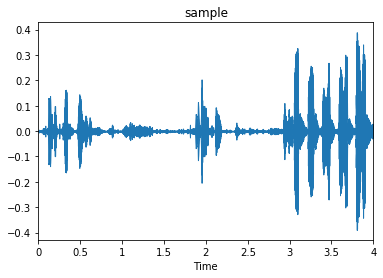

In [258]:
import matplotlib.pyplot as plt
plt.figure()
display.waveplot(data, sr=sampling_rate)
plt.title('sample')

#### Load the train.csv and test.csv files

In [259]:
train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

### Train class distribution

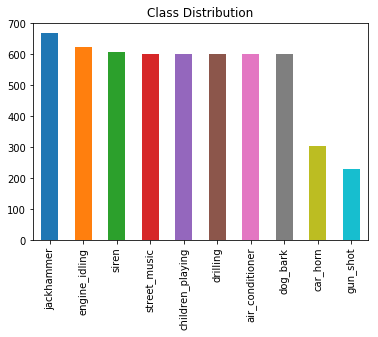

In [260]:
train.Class.value_counts().plot(kind = 'bar')
plt.title('Class Distribution')
plt.show()

#### Load Audio files and extract features

In [11]:
def loadAudioDataExtractFeatures(path_to_data,file_ID, file_format = 'wav'):
    X, sample_rate = librosa.load(os.path.join(path_to_data, file_ID + '.' + file_format),
                res_type='kaiser_fast')
    # we extract mfcc feature from data
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    return mfccs

In [46]:
loadAudioDataExtractFeatures('Train', '0')

array([-82.12358939, 139.50591598, -42.43086489,  24.82786139,
       -11.62076447,  23.49708426, -12.19458986,  25.89713885,
        -9.40527728,  21.21042898,  -7.36882138,  14.25433903,
        -8.67870015,   7.75023765, -10.1241154 ,   3.2581183 ,
       -11.35261914,   2.80096779,  -7.04601346,   3.91331351,
        -2.3349743 ,   2.01242254,  -2.79394367,   4.12927394,
        -1.62076864,   4.32620082,  -1.03440959,  -1.23297714,
        -3.11085341,   0.32044827,  -1.787786  ,   0.44295495,
        -1.79164752,  -0.76361758,  -1.24246428,  -0.27664012,
         0.65718559,  -0.50237115,  -2.60428533,  -1.05346291])

In [48]:
X = [loadAudioDataExtractFeatures('Train',str(i)) for i in train.ID]

In [56]:
y = train.Class

In [51]:
X_test = [loadAudioDataExtractFeatures('Test',str(i)) for i in test.ID]

In [53]:
np.save('X_train.npy', np.array(X))

In [54]:
np.save('X_test.npy', np.array(X_test))

In [12]:
X = np.load('X_train.npy')
X_test = np.load('X_test.npy')

In [13]:
y = train.Class

In [14]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
X = np.array(X )
y = np.array(y.tolist())

lb = LabelEncoder()

y = to_categorical(lb.fit_transform(y))

In [15]:
X[0]

array([-82.12358939, 139.50591598, -42.43086489,  24.82786139,
       -11.62076447,  23.49708426, -12.19458986,  25.89713885,
        -9.40527728,  21.21042898,  -7.36882138,  14.25433903,
        -8.67870015,   7.75023765, -10.1241154 ,   3.2581183 ,
       -11.35261914,   2.80096779,  -7.04601346,   3.91331351,
        -2.3349743 ,   2.01242254,  -2.79394367,   4.12927394,
        -1.62076864,   4.32620082,  -1.03440959,  -1.23297714,
        -3.11085341,   0.32044827,  -1.787786  ,   0.44295495,
        -1.79164752,  -0.76361758,  -1.24246428,  -0.27664012,
         0.65718559,  -0.50237115,  -2.60428533,  -1.05346291])

In [16]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [17]:
num_labels = y.shape[1]

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.model_selection import  train_test_split

In [19]:
import keras.backend as K
def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [45]:
model_name = 'Basic_NN'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]

model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               10496     
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
__________

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 124)

In [48]:
model.fit(x_train, y_train, callbacks = callbacks,
          epochs=15000, validation_split=0.25)

Train on 2730 samples, validate on 911 samples
Epoch 1/15000
2730/2730 [==============================] - 0s 174us/step - loss: 12.9058 - acc: 0.1399 - recall: 0.1388 - val_loss: 11.7360 - val_acc: 0.2294 - val_recall: 0.2294
Epoch 2/15000
2730/2730 [==============================] - 0s 97us/step - loss: 11.3720 - acc: 0.2190 - recall: 0.2187 - val_loss: 10.2838 - val_acc: 0.2810 - val_recall: 0.2810
Epoch 3/15000
2730/2730 [==============================] - 0s 103us/step - loss: 10.1370 - acc: 0.2810 - recall: 0.2810 - val_loss: 7.5109 - val_acc: 0.3996 - val_recall: 0.3985
Epoch 4/15000
2730/2730 [==============================] - 0s 92us/step - loss: 8.3357 - acc: 0.3319 - recall: 0.3282 - val_loss: 3.9169 - val_acc: 0.4830 - val_recall: 0.4632
Epoch 5/15000
2730/2730 [==============================] - 0s 101us/step - loss: 5.1870 - acc: 0.3608 - recall: 0.3388 - val_loss: 1.8764 - val_acc: 0.5170 - val_recall: 0.2799
Epoch 6/15000
2730/2730 [==============================] - 0s 101

In [49]:
model.metrics_names

['loss', 'acc', 'recall']

In [50]:
model.evaluate(x_train, y_train)

3641/3641 [==============================] - 0s 33us/step


[0.738762637115841, 0.7758857455760428, 0.5943422136611907]

In [51]:
train_preds = model.predict_classes(x_train)
test_preds = model.predict_classes(x_test)

In [52]:
model.evaluate(x_test, y_test)

1794/1794 [==============================] - 0s 37us/step


[0.8807835343689424, 0.7279821627647715, 0.5607580824972129]

In [53]:
saveModel(model,model_file_name='basic_NN')

Saved model basic_NN to disk


In [54]:
model = loadModel('basic_NN')

Loaded model basic_NN from disk


In [55]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [56]:
model.evaluate(x_test, y_test)

1794/1794 [==============================] - 0s 121us/step


[0.8807835343689424, 0.7279821627647715, 0.5607580824972129]

In [57]:
from sklearn.metrics import classification_report

In [58]:
lb.classes_

array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'], dtype='|S16')

In [59]:
import sklearn

In [60]:
sklearn.__version__

'0.20.0'

In [61]:
# !pip install  --user --upgrade scikit-learn

In [62]:
target_names = lb.classes_

In [63]:
pd.DataFrame(classification_report(y_pred=test_preds,
                      y_true=y_test.argmax(axis=1),
                      target_names = target_names,
                     output_dict = True
                     ))

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,macro avg,micro avg,siren,street_music,weighted avg
f1-score,0.736585,0.780488,0.533917,0.684058,0.815789,0.795812,0.748201,0.832700,0.731561,0.727982,0.863636,0.524422,0.731680
precision,0.782383,0.876712,0.450185,0.802721,0.928144,0.826087,0.764706,0.737374,0.755069,0.727982,0.859296,0.523077,0.751060
recall,0.695853,0.703297,0.655914,0.595960,0.727700,0.767677,0.732394,0.956332,0.722892,0.727982,0.868020,0.525773,0.727982
support,217.000000,91.000000,186.000000,198.000000,213.000000,198.000000,71.000000,229.000000,1794.000000,1794.000000,197.000000,194.000000,1794.000000


### RNN

In [38]:
from keras.layers import SimpleRNN

In [41]:
# SimpleRNN()

In [79]:
# x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [98]:
x_rnn_train  = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_rnn_test  = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [113]:
model_name = 'Basic_RNN'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]



model = Sequential()
model.add(SimpleRNN(256 , input_shape=(x_rnn_train.shape[1], x_rnn_train.shape[2])))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [114]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_11 (SimpleRNN)    (None, 256)               76032     
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_34 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_35 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
__________

In [104]:
model.fit(x_rnn_train, y_train, callbacks = callbacks,
          epochs=15000, validation_split=0.25)

Train on 2730 samples, validate on 911 samples
Epoch 1/15000
2730/2730 [==============================] - 2s 820us/step - loss: 2.1010 - acc: 0.2542 - recall: 0.0469 - val_loss: 1.6959 - val_acc: 0.4731 - val_recall: 0.0735
Epoch 2/15000
2730/2730 [==============================] - 0s 150us/step - loss: 1.7307 - acc: 0.3941 - recall: 0.1454 - val_loss: 1.4923 - val_acc: 0.5049 - val_recall: 0.1855
Epoch 3/15000
2730/2730 [==============================] - 0s 139us/step - loss: 1.4737 - acc: 0.5015 - recall: 0.2681 - val_loss: 1.3276 - val_acc: 0.5653 - val_recall: 0.3721
Epoch 4/15000
2730/2730 [==============================] - 0s 142us/step - loss: 1.3283 - acc: 0.5436 - recall: 0.3487 - val_loss: 1.2389 - val_acc: 0.5950 - val_recall: 0.3765
Epoch 5/15000
2730/2730 [==============================] - 0s 142us/step - loss: 1.2383 - acc: 0.5777 - recall: 0.3989 - val_loss: 1.1251 - val_acc: 0.6345 - val_recall: 0.4303
Epoch 6/15000
2730/2730 [==============================] - 2s 850us/

In [109]:
print(model.metrics_names)
print(model.evaluate(x_rnn_train, y_train))
print(model.evaluate(x_rnn_test, y_test))
train_preds = model.predict_classes(x_rnn_train)
test_preds = model.predict_classes(x_rnn_test)
target_names = lb.classes_
pd.DataFrame(classification_report(y_pred=test_preds,
                      y_true=y_test.argmax(axis=1),
                      target_names = target_names,
                     output_dict = True
                     ))

['loss', 'acc', 'recall']
3641/3641 [==============================] - 0s 55us/step
[0.49225256204670587, 0.8401538040964723, 0.7876956881615068]
1794/1794 [==============================] - 0s 53us/step
[0.7073880428720345, 0.7887402452619844, 0.7335562987736901]


,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,macro avg,micro avg,siren,street_music,weighted avg
f1-score,0.849257,0.800000,0.614657,0.672515,0.836186,0.931707,0.719424,0.879684,0.777432,0.78874,0.875648,0.595238,0.784651
precision,0.787402,0.891892,0.548523,0.798611,0.872449,0.900943,0.735294,0.802158,0.793568,0.78874,0.894180,0.704225,0.794354
recall,0.921659,0.725275,0.698925,0.580808,0.802817,0.964646,0.704225,0.973799,0.774549,0.78874,0.857868,0.515464,0.788740
support,217.000000,91.000000,186.000000,198.000000,213.000000,198.000000,71.000000,229.000000,1794.000000,1794.00000,197.000000,194.000000,1794.000000


### LSTM

In [115]:
from keras.layers import LSTM

In [116]:
model_name = 'Basic_LSTM'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]



model = Sequential()
model.add(LSTM(256 , input_shape=(x_rnn_train.shape[1], x_rnn_train.shape[2])))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [117]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               304128    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_37 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_38 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
__________

In [118]:
model.fit(x_rnn_train, y_train, callbacks = callbacks,
          epochs=15000, validation_split=0.25)

Train on 2730 samples, validate on 911 samples
Epoch 1/15000
2730/2730 [==============================] - 1s 500us/step - loss: 1.9818 - acc: 0.2967 - recall: 0.0527 - val_loss: 1.5506 - val_acc: 0.4577 - val_recall: 0.1954
Epoch 2/15000
2730/2730 [==============================] - 1s 203us/step - loss: 1.4255 - acc: 0.5048 - recall: 0.2813 - val_loss: 1.2330 - val_acc: 0.5719 - val_recall: 0.3633
Epoch 3/15000
2730/2730 [==============================] - 1s 195us/step - loss: 1.1774 - acc: 0.6033 - recall: 0.4143 - val_loss: 1.0589 - val_acc: 0.6378 - val_recall: 0.5038
Epoch 4/15000
2730/2730 [==============================] - 1s 198us/step - loss: 1.0338 - acc: 0.6626 - recall: 0.5004 - val_loss: 0.9629 - val_acc: 0.6784 - val_recall: 0.5697
Epoch 5/15000
2730/2730 [==============================] - 1s 209us/step - loss: 0.8871 - acc: 0.7059 - recall: 0.5821 - val_loss: 0.8765 - val_acc: 0.7135 - val_recall: 0.6081
Epoch 6/15000
2730/2730 [==============================] - 1s 198us/

In [119]:
print(model.metrics_names)
print(model.evaluate(x_rnn_train, y_train))
print(model.evaluate(x_rnn_test, y_test))
train_preds = model.predict_classes(x_rnn_train)
test_preds = model.predict_classes(x_rnn_test)
target_names = lb.classes_
pd.DataFrame(classification_report(y_pred=test_preds,
                      y_true=y_test.argmax(axis=1),
                      target_names = target_names,
                     output_dict = True
                     ))

['loss', 'acc', 'recall']
3641/3641 [==============================] - 0s 55us/step
[0.2890902078763956, 0.9129360066734478, 0.8816259270249995]
1794/1794 [==============================] - 0s 48us/step
[0.5538540593490686, 0.822742474916388, 0.7937569676700111]


,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,macro avg,micro avg,siren,street_music,weighted avg
f1-score,0.901099,0.817680,0.690027,0.697674,0.883495,0.870968,0.733333,0.952381,0.809260,0.822742,0.905941,0.640000,0.819320
precision,0.861345,0.822222,0.691892,0.821918,0.914573,0.800847,0.696203,0.944206,0.810025,0.822742,0.884058,0.662983,0.822168
recall,0.944700,0.813187,0.688172,0.606061,0.854460,0.954545,0.774648,0.960699,0.814396,0.822742,0.928934,0.618557,0.822742
support,217.000000,91.000000,186.000000,198.000000,213.000000,198.000000,71.000000,229.000000,1794.000000,1794.000000,197.000000,194.000000,1794.000000


In [121]:
saveModel(model, 'Basic_LSTM')

Saved model Basic_LSTM to disk


In [122]:
from keras.layers import Bidirectional

In [137]:
model_name = 'Bidirectional_LSTM'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]



model = Sequential()
model.add(Bidirectional(LSTM(256 ,return_sequences=True),
                        input_shape=(x_rnn_train.shape[1], x_rnn_train.shape[2])))
model.add(Bidirectional(LSTM(10)))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [139]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 1, 512)            608256    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 20)                41840     
_________________________________________________________________
dense_52 (Dense)             (None, 256)               5376      
_________________________________________________________________
activation_52 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_53 (Activation)   (None, 256)               0         
__________

In [140]:
model.fit(x_rnn_train, y_train, callbacks = callbacks,
          epochs=15000, validation_split=0.25)

Train on 2730 samples, validate on 911 samples
Epoch 1/15000
2730/2730 [==============================] - 4s 1ms/step - loss: 1.9710 - acc: 0.2897 - recall: 0.0509 - val_loss: 1.5552 - val_acc: 0.4599 - val_recall: 0.1679
Epoch 2/15000
2730/2730 [==============================] - 1s 335us/step - loss: 1.3291 - acc: 0.5429 - recall: 0.3282 - val_loss: 1.1152 - val_acc: 0.6465 - val_recall: 0.4325
Epoch 3/15000
2730/2730 [==============================] - 1s 326us/step - loss: 0.9862 - acc: 0.6912 - recall: 0.5352 - val_loss: 1.0011 - val_acc: 0.6729 - val_recall: 0.5818
Epoch 4/15000
2730/2730 [==============================] - 1s 334us/step - loss: 0.8234 - acc: 0.7407 - recall: 0.6352 - val_loss: 0.9725 - val_acc: 0.6915 - val_recall: 0.6400
Epoch 5/15000
2730/2730 [==============================] - 1s 333us/step - loss: 0.7348 - acc: 0.7722 - recall: 0.6886 - val_loss: 0.8161 - val_acc: 0.7431 - val_recall: 0.6959
Epoch 6/15000
2730/2730 [==============================] - 1s 337us/st

In [141]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 1, 512)            608256    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 20)                41840     
_________________________________________________________________
dense_52 (Dense)             (None, 256)               5376      
_________________________________________________________________
activation_52 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_53 (Activation)   (None, 256)               0         
__________

In [142]:
print(model.metrics_names)
print(model.evaluate(x_rnn_train, y_train))
print(model.evaluate(x_rnn_test, y_test))
train_preds = model.predict_classes(x_rnn_train)
test_preds = model.predict_classes(x_rnn_test)
target_names = lb.classes_
pd.DataFrame(classification_report(y_pred=test_preds,
                      y_true=y_test.argmax(axis=1),
                      target_names = target_names,
                     output_dict = True
                     ))

['loss', 'acc', 'recall']
3641/3641 [==============================] - 0s 79us/step
[0.27040404762353454, 0.9217248008133978, 0.9101895085732644]
1794/1794 [==============================] - 0s 65us/step
[0.5775346641689373, 0.8567447045707915, 0.8400222965440357]


,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,macro avg,micro avg,siren,street_music,weighted avg
f1-score,0.934240,0.787234,0.770781,0.760108,0.894866,0.923833,0.813008,0.947826,0.847364,0.856745,0.927461,0.714286,0.857200
precision,0.919643,0.762887,0.725118,0.815029,0.933673,0.899522,0.961538,0.943723,0.859219,0.856745,0.947090,0.683962,0.861682
recall,0.949309,0.813187,0.822581,0.712121,0.859155,0.949495,0.704225,0.951965,0.841809,0.856745,0.908629,0.747423,0.856745
support,217.000000,91.000000,186.000000,198.000000,213.000000,198.000000,71.000000,229.000000,1794.000000,1794.000000,197.000000,194.000000,1794.000000


In [143]:
saveModel(model,'Bidirectional_LSTM_basic')

Saved model Bidirectional_LSTM_basic to disk


#### Testing soe random sounds 

- These sounds were downloaded from the internet from random websites

In [222]:
dog = loadAudioDataExtractFeatures(os.getcwd(),'Sound_model_testing_files/labrador-barking-daniel_simon')
dog = dog.reshape(1, 1, x_train.shape[1])

In [224]:
model.predict_classes(dog)

array([3])

In [225]:
target_names[model.predict_classes(dog)]

array(['dog_bark'], dtype='|S16')

In [155]:
model.predict(dog)

array([[1.2600895e-08, 3.3819091e-05, 1.3842466e-06, 9.9922311e-01,
        4.7317421e-08, 8.1915559e-09, 6.4753694e-04, 9.2892888e-11,
        8.0359227e-05, 1.3801110e-05]], dtype=float32)

In [175]:
def prepTestingData( file_name, path_to_file = os.getcwd()):
    temp = loadAudioDataExtractFeatures(path_to_file,file_name)
    temp = temp.reshape(1, 1, x_train.shape[1])
    return temp

In [230]:
traffic = prepTestingData('Sound_model_testing_files/Traffic_Jam-Yo_Mama-1164700013')

In [231]:
model.predict(traffic)

array([[8.5836740e-07, 9.8423499e-01, 2.5595795e-05, 5.4942199e-04,
        2.9425580e-06, 6.7058654e-04, 6.4532622e-05, 1.8285724e-05,
        2.4906924e-06, 1.4430250e-02]], dtype=float32)

In [232]:
model.predict_classes(traffic)

array([1])

In [233]:
target_names[model.predict_classes(traffic)]

array(['car_horn'], dtype='|S16')

In [168]:
print(model.predict(prepTestingData('Truck Idle And Pull Off-SoundBible.com-1854979252')))
print(model.predict_classes(prepTestingData('Truck Idle And Pull Off-SoundBible.com-1854979252')))

[[5.2300771e-04 7.7593909e-03 2.1584921e-02 5.2664643e-03 7.0475426e-04
  7.9487616e-01 1.2075792e-03 5.6022976e-04 1.5010108e-04 1.6736732e-01]]
[5]


In [173]:
for i in os.listdir('Sound_model_testing_files/'):
    print(i.split(".")[0])

muscle-car-daniel_simon
service-bell_daniel_simion
Driving Ambiance-SoundBible
Driving Ambiance-SoundBible
soundbible-person-whistling-at-girl-daniel_simon
sawing-wood-daniel_simon
airplane-landing_daniel_simion


In [237]:
for i in os.listdir('Sound_model_testing_files/'):
    i = i.split(".")[0]
    print("Actual : {}".format(i))
    print(model.predict(prepTestingData(i, 'Sound_model_testing_files/')))
    print(model.predict_classes(prepTestingData(i, 'Sound_model_testing_files/')))
    print("Predicted : {}".format(target_names[model.predict_classes(prepTestingData(i, 'Sound_model_testing_files/'))]))
    print("-----")

Actual : muscle-car-daniel_simon
[[9.8235655e-01 1.7412767e-05 1.2603774e-03 1.9844372e-03 2.7559671e-04
  1.6123786e-03 2.1714531e-04 6.1964389e-04 9.6753929e-03 1.9811450e-03]]
[0]
Predicted : ['air_conditioner']
-----
Actual : service-bell_daniel_simion
[[1.36804243e-04 1.47859350e-01 1.78302964e-03 7.35804677e-01
  1.15901865e-02 6.18520353e-05 7.12141767e-02 5.79571177e-04
  1.40949350e-03 2.95609441e-02]]
[3]
Predicted : ['dog_bark']
-----
Actual : soundbible-person-whistling-at-girl-daniel_simon
[[1.7222685e-06 2.0960924e-05 2.6173888e-05 3.5279733e-01 1.6631675e-07
  1.0635029e-05 1.0535595e-03 1.7781408e-08 6.4608306e-01 6.4253354e-06]]
[8]
Predicted : ['siren']
-----
Actual : sawing-wood-daniel_simon
[[1.7163341e-04 3.4094129e-02 4.2328192e-03 3.2407063e-01 3.5033823e-04
  1.3552909e-04 1.5879493e-02 1.9424024e-05 2.7745479e-04 6.2076855e-01]]
[9]
Predicted : ['street_music']
-----
Actual : airplane-landing_daniel_simion
[[7.2832612e-05 5.5994126e-03 3.4981415e-01 5.1639997e-

### Submission File

In [279]:
test_IDs = pd.read_csv('test.csv',usecols = ['ID'])

In [263]:
test_data = [loadAudioDataExtractFeatures('Test', str(i)) for i in test.ID]

In [264]:
np.save('test.npy', np.array(test_data))

In [270]:
test_data = np.load('test.npy')

In [272]:
test = np.array(test_data).reshape(test_data.shape[0], 1, test_data.shape[1])

In [275]:
test_data_preds = model.predict_classes(test)

In [278]:
test_data_preds.shape

(3297,)

In [280]:
test_data_preds_classes = [target_names[i] for i in test_data_preds]

In [290]:
test_sub = pd.DataFrame({'Class': test_data_preds_classes, 'ID':test_IDs.ID})

In [291]:
test_sub.to_csv('sub.csv',index=False)